<a href="https://colab.research.google.com/github/friedameissner/SpringSchool/blob/main/k_Means_(Spring_School).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Crashkurs Python und Google Colab
Hier ein kleiner Überblick über die wichtigsten Dinge, wie wir gleich zur Implementierung von k-Means brauchen:

## Google Colab
Mit Google Colab können wir Python-Notebooks auf Googles Servern laufen lassen, ohne lokal Python installieren zu müssen. Ihr könnt also mit (nahezu) jedem Gerät auf das Notebook zugreifen und den Code ausführen, sofern eine Internetverbindung besteht.
Befolgt dafür bitte die folgenden Schritte:
1. Meldet euch mit eurem **Google-Account** an.
2. Speichert eine **Kopie** des Notebooks in **Google Drive** (Leiste oben links).

Dann öffnet sich ein neuer Tab, in dem ihr das Notebook bearbeiten könnt, Änderungen werden automatisch gesichert.

Um das Notebook später wieder zu öffnen, geht ihr entweder auf die Colab- oder Drive-Startseite und wählt die Datei im Ordner *Colab Notebooks* aus.

Die Notebooks bestehen aus sogenannten Text- und Code-Zellen. Zum Ausführen des Python-Codes in den *Code-Zellen*, klickt ihr auf den ▶️-Button oder drückt `Shift + Enter`.




## Python
Python ist eine der beliebtesten und intuitivsten Programmiersprachen, deren Syntax einfach zu verstehen ist. Im Gegensatz zu anderen Sprachen benötigt man keine Klammern zur Definition von Gültigkeitsbereichen, sondern "organisiert" Zusammenhänge mit Einrückungen und Doppelpunkten.

### Variablen
Variablen dienen als **Platzhalter** für gespeicherte Zahlenwerte (Integer, Floats), Zeichenketten (Strings), Listen oder komplexere Objekte. Ihr Wert kann mit der **Zuweisung** `=` jederzeit (auch mit einem anderen Datentyp) überschrieben werden.

Achtet bei der Benennung auf aussagekräftige Variablennamen und kombiniert zusammengesetzte Namen am besten per Unterstrich (`gerade_zahl`) oder indem ihr den Anfangsbuchstaben der folgenden Wörter großschreibt (`geradeZahl`).

In [ ]:
x = 3       # Variable x (Integer) erhält Wert 3
print(x)    # Ausgabe des Werts von x auf der Konsole

obst = "Erdbeere"  # Variable obst (String/Zeichenkette)
char_liste = ["a", "D", "x", "o"] # Liste aus Strings
print(char_liste[0])              # Indizierung beginnt bei 0
print(len(char_liste))            # Anzahl der Listenelemente

### Rechenoperationen
Wie mit einem Taschenrechner können wir verschiedene Basisoperationen auf Zahlen, ggf. in Variablen gespeichert, anwenden.

Bei der Kombination verschiedener Operationen gilt wie immer Punkt- vor Strichsetzung, wobei (runde) Klammern und Potenzen zuerst ausgewertet werden.

In [ ]:
a = 10
b = 3

print(a + b)   # Addition
print(a - b)   # Subtraktion
print(a * b)   # Multiplikation
print(a / b)   # Division
print(a // b)  # Division mit Abrunden
print(a % b)   # Rest bei Division
print(b ** 2)  # Potenzieren

13
7
30
3.3333333333333335
3
1
9


### if-Abfragen
Häufig möchte man bestimmte Codezeilen nur ausführen, wenn gewisse **Bedingungen** erfüllt sind. Eine if-Abfrage setzt sich wie folgt zusammen:

>`if` *Bedingung* **:**
>>*Anweisung*

Zur Formulierung der Bedingung sind meistens **Vergleichsoperatoren** notwendig.

In [ ]:
a = 10
b = 3

if a < b:
    print("a ist kleiner als b.")
if a <= b:
    print("a ist kleiner oder gleich b.")
if a == b:
    print("a ist gleich b.") # auch auf Strings anwendbar
if a >= b:
    print("a ist größer oder gleich b.")
if a > b:
    print("a ist größer als b.")

a ist größer oder gleich b.
a ist größer als b.


### for-Schleifen
Um einen Codeblock endlich oft zu wiederholen, verwendet man for-Schleifen, die die Einträge eines iterierbaren Objekts, z.B. einer Liste, durchlaufen.

Typischerweise nutzt man zur Iteration eine Zahlenfolge der Funktion ```range(start, stop, step)```. Ihre Parameter ```start, stop, step``` legen den Startwert (Standardwert 0), den Stoppwert, der am Ende nicht enthalten ist, und die Schrittweite (Standardwert 1) fest. Über eine negative Schrittweite kann man auch absteigende Folgen generieren.

In [ ]:
char_liste = ["a", "D", "x", "o"]

for char in char_liste: # Jedes Listenelement wird durchlaufen
    print(char)         # und ausgegeben.
print("\n")

for i in range(0, 5, 1): # Jedes Folgenglied wird durchlaufen
    print(i ** 2)           # und quadriert ausgegeben.
print("\n")

print(list(range(5, 0, -1))) # absteigende Folge

a
D
x
o


0
1
4
9
16


[5, 4, 3, 2, 1]


### Packages
Da die Python-Basisfunktionen manchmal nicht ausreichen, gibt es viele verschiedene Packages, die anwendungsspezifische Funktionen zu Verfügung stellen und wie folgt importiert werden können:


In [ ]:
import numpy            # Import des gesamten Packages
import numpy as np      # Import des gesamten Packages mit kürzerer Bezeichnung
from numpy import sqrt  # Import der sqrt-Funktion (Wurzel) von numpy

print(np.max([3, 5]))
print(sqrt(9))          # keine np. bei sqrt mehr notwendig!

5
3.0


Diese Packages werden wir später u.a. nutzen:
1. [numpy](https://numpy.org/doc/stable/) für das Rechnen mit speziellen Listen
2. [matplotlib.pyplot](https://matplotlib.org/stable/users/index) für Datenvisualisierungen

# Implementierung und Anwendung des k-Means-Clusterings


## Setup
Im Setup werden drei Punktewolken generiert und hier anschließend dargestellt.

In [ ]:
!wget -nc -q https://raw.githubusercontent.com/friedameissner/SpringSchool/refs/heads/main/Rapsfeld.jpg
!wget -nc -q https://raw.githubusercontent.com/friedameissner/SpringSchool/refs/heads/main/Mohnfeld.jpg
!wget -nc -q https://raw.githubusercontent.com/friedameissner/SpringSchool/refs/heads/main/MRT_Kopf.jpeg
!wget -nc -q https://raw.githubusercontent.com/friedameissner/SpringSchool/refs/heads/main/MRT_Tumor.jpeg
!wget -nc -q https://raw.githubusercontent.com/friedameissner/SpringSchool/refs/heads/main/Thermo.jpg
!wget -nc -q https://raw.githubusercontent.com/friedameissner/SpringSchool/refs/heads/main/utils.py

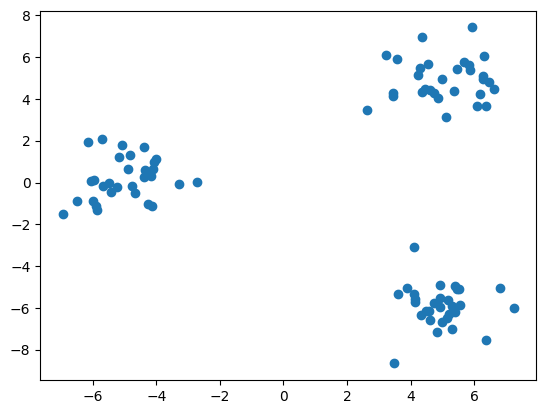

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import utils
import ipywidgets
from IPython.display import display
from skimage import io
from tqdm.auto import trange

data, _ = utils.setup()

plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Batch-Learning
Im folgenden Codeblock wird das k-Means-Update für Batch-Learning implementiert. Das meint genau den Updateschritt, wie wir ihn vorhin kennengelernt haben: Jeder Codebook-Vektor wird auf den Schwerpunkt seines Clusters verschoben, d.h. wir benötigen alle zugehörigen Punkte ("Batch").

### Ablauf
1. Zuordnung der Punkte $\boldsymbol{x}^{\mu}, \mu=1, \dots, n$, auf die Cluster der Codebook-Vektoren $\boldsymbol{cb}_{i}, i=1, \dots, k$
2. Update des Codebook-Vektors $\boldsymbol{cb}_{i}$ durch Verschiebung in den Schwerpunkt seines Clusters, d.h. $\boldsymbol{cb}_{i} = \frac{1}{m} \sum_{\mu=1}^{m} \boldsymbol{x}^{\mu}, m \leq n$, für die $m$ Datenpunkte $\boldsymbol{x}^{\mu}$ aus dem $i$-ten Cluster

### Aufgabe
Vervollständigt die folgende Batch-Learning-Implementierung vom k-Means-Update, indem ihr die Lücken ```__``` passend füllt. Die Kommentare geben an, was in der jeweiligen Zeile passieren soll.

In [ ]:
def kmeans_update_b(codebook, data):
    cb = codebook.copy()

    # Finde nächsten Codebook-Vektor
    cluster_id = np.zeros(len(data)) # Indices der zugehörigen Cluster

    for i in range(len(data)):
        dist = __ # bisher minimale Distanz, initialisiert mit ∞

        for j in range(len(cb)):
            abstand = __ # Berechne Abstand zwischen aktuellem Datenpunkt (i) und aktuellem Codebook (j)
            if __: # Wenn der aktuelle Abstand kürzer als der bisher kürzeste ist...
                dist = __ # Aktualisiere bisher kürzesten Abstand
                cluster_id[i] = __ # Bestimme Index des zugehörigen Clusters

    # Update der Codebook-Vektoren
    for i in range(len(cb)):
        cluster = np.arange(len(data))[cluster_id==i] # Indices aller Datenpunkte im Cluster
        if len(cluster) > 0:
            cb[i] = __ # Update des Codebook-Vektors

    return cb

In [ ]:
# Lösung
def kmeans_update_b(codebook, data):
    cb = codebook.copy()

    # Finde nächsten Codebook-Vektor
    cluster_id = np.zeros(len(data)) # Indices der zugehörigen Cluster

    for i in range(len(data)):
        dist = np.inf # bisher minimale Distanz, initialisiert mit ∞

        for j in range(len(cb)):
            abstand = np.sum((cb[j]-data[i])**2)**0.5 # Berechne Abstand zwischen aktuellem Datenpunkt (i) und aktuellem Codebook (j)
            if abstand < dist: # Wenn der aktuelle Abstand kürzer als der bisher kürzeste ist...
                dist = abstand # Aktualisiere bisher kürzesten Abstand
                cluster_id[i] = j # Bestimme Index des zugehörigen Clusters

    # Update der Codebook-Vektoren
    for i in range(len(cb)):
        cluster = np.arange(len(data))[cluster_id==i] # Indices aller Datenpunkte im Cluster
        if len(cluster) > 0:
            cb[i] = np.mean(data[cluster], axis=0) # Update des Codebook-Vektors

    return cb

Hier könnt ihr den Algorithmus für unterschiedliche $k$ testen. Wählt dafür ein $k$ in Zeile 2 und ergänzt den Aufruf des Batch-Updates in Zeile 11.

In [ ]:
# --- Hier kann das k angepasst werden ---
k = __
# ----------------------------------------
codebook = np.random.rand(k, 2)*(np.max(data, axis=0)-np.min(data, axis=0))+np.min(data, axis=0)
label, error = utils.zugehoerigkeit(codebook, data)
utils.draw(codebook, data, title="Initialisierung")
print(f"Fehler bei Initialisierung: {error}")

for i in range(3): # ggf. Anzahl der Iterationen von 3 erhöhen
    codebook = __ # Aufruf des k-Means-Updates
    label, error = utils.zugehoerigkeit(codebook, data)
    utils.draw(codebook, data, title=f"Epoche {i+1}")
    print(f"Fehler in Epoche {i+1}: {error}")

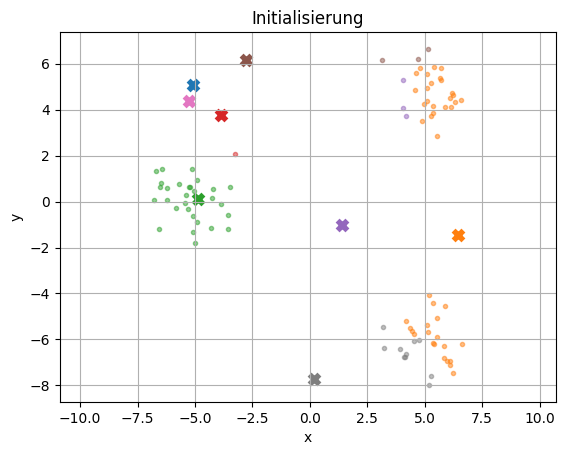

Fehler bei Initialisierung: 4.007217818387446


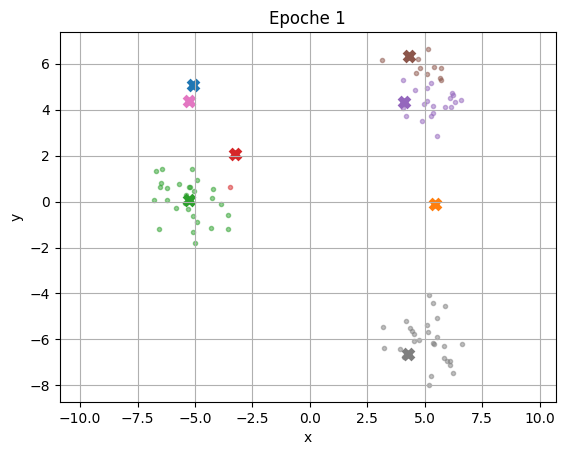

Fehler in Epoche 1: 1.2887577639512626


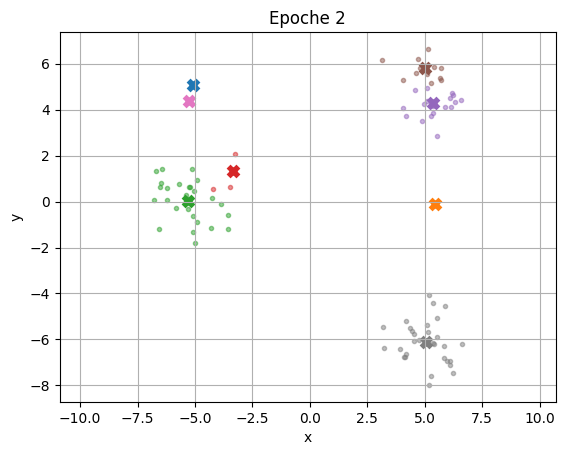

Fehler in Epoche 2: 1.0142080210996693


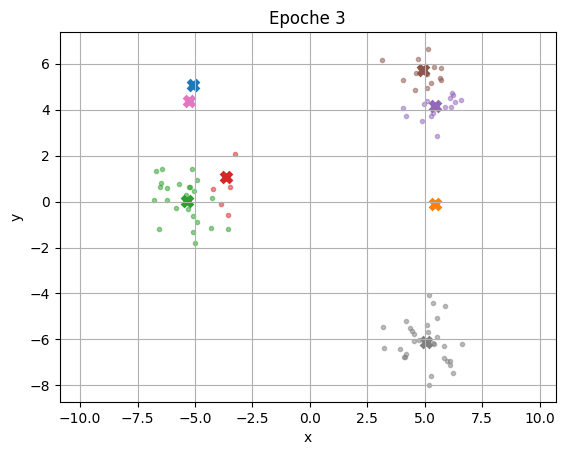

Fehler in Epoche 3: 0.9985375237119669


In [ ]:
# Lösung
# --- Hier kann das k angepasst werden ---
k = 8
# ----------------------------------------
codebook = np.random.rand(k, 2)*(np.max(data, axis=0)-np.min(data, axis=0))+np.min(data, axis=0)
label, error = utils.zugehoerigkeit(codebook, data)
utils.draw(codebook, data, title="Initialisierung")
print(f"Fehler bei Initialisierung: {error}")

for i in range(3): # ggf. Anzahl der Iterationen von 3 erhöhen
    codebook = kmeans_update_b(codebook, data) # Aufruf des k-Means-Updates
    label, error = utils.zugehoerigkeit(codebook, data)
    utils.draw(codebook, data, title=f"Epoche {i+1}")
    print(f"Fehler in Epoche {i+1}: {error}")

## Bonus: Pattern-by-Pattern-Learning
Neben dem Batch-Learning gibt es noch das Pattern-by-Pattern-Learning. Hier wird jeder Datenpunkt einzeln betrachtet und der jeweils zugehörige Codebook-Vektor direkt etwas verschoben, ohne die übrigen Punkte zu berücksichtigen.

### Ablauf
1. Suche des am nächsten liegenden Codebook-Vektors $\boldsymbol{cb}_{i^*}$ für einen beliebigen Punkt $\boldsymbol{x}^{\mu}$ aus der Menge der Datenpunkte
2. Update des Codebook-Vektors gemäß $\boldsymbol{cb}_{i^*} = \boldsymbol{cb}_{i^*} + \epsilon_{t} \left( \boldsymbol{x}^{\mu} − \boldsymbol{cb}_{i^*} \right)$

Eine Lernrate $\epsilon_{t} = 0.1$ bedeutet hier, dass der Codebook-Vektor um 10 % der Strecke in Richtung des gegebenen Punkts verschoben wird.

### Aufgabe
Vervollständigt die folgende PBP-Learning-Implementierung vom k-Means-Update, indem ihr die Lücken ```__``` passend füllt. Die Kommentare geben an, was in der jeweiligen Zeile passieren soll.

In [ ]:
def kmeans_update_pbp(codebook, point, lernrate=0.1):
    cb = codebook.copy()
    # Finde nächsten Codebook-Vektor
    dist = __ # bisher minimale Distanz, initialisiert mit ∞

    # Iteriere über alle Codebook-Vektoren
    for i in range(len(cb)):
        cb_i = cb[i] # aktuell betrachteter Codebook-Vektor
        abstand = __ # Berechne Abstand
        if __: # Wenn der aktuelle Abstand kürzer als der bisher kürzeste ist...
            dist = __ # Aktualisiere bisher kürzesten Abstand
            i_star = __ # Bestimme den Index des nächsten Codebook-Vektors

    # Update des nächsten Codebook-Vektors
    cb[i_star] = __

    return cb

In [ ]:
# Lösung
def kmeans_update_pbp(codebook, point, lernrate=0.1):
    cb = codebook.copy()
    # Finde nächsten Codebook-Vektor
    dist = np.inf  # bisher minimale Distanz, initialisiert mit ∞

    # Iteriere über alle Codebook-Vektoren
    for i in range(len(cb)):
        cb_i = cb[i] # aktuell betrachteter Codebook-Vektor
        abstand = np.sum((cb_i - point) ** 2) ** 0.5 # Berechne Abstand
        if abstand < dist: # Wenn der aktuelle Abstand kürzer als der bisher kürzeste ist...
            dist = abstand # Aktualisiere bisher kürzesten Abstand
            i_star = i # Bestimme den Index des nächsten Codebook-Vektors

    # Update des nächsten Codebook-Vektors
    cb[i_star] = cb[i_star] + lernrate*(point - cb[i_star])

    return cb

Hier könnt ihr den Algorithmus für unterschiedliche $k$ testen. Wählt dafür ein $k$ in Zeile 2 und ergänzt den Aufruf des PBP-Updates in Zeile 11.

In [ ]:
# --- Hier kann das k angepasst werden ---
k = __
# ----------------------------------------
codebook = np.random.rand(k, 2)*(np.max(data, axis=0)-np.min(data, axis=0))+np.min(data, axis=0)
label, error = utils.zugehoerigkeit(codebook, data)
utils.draw(codebook, data, title="Initialisierung")
print(f"Fehler bei Initialisierung: {error}")

for i in range(3): # ggf. Anzahl der Iterationen von 3 erhöhen
    for p in np.random.permutation(data): # Iteration über jeden Datenpunkt p
        codebook = __ # Aufruf des k-Means-Updates
    label, error = utils.zugehoerigkeit(codebook, data)
    utils.draw(codebook, data, title=f"Epoche {i+1}")
    print(f"Fehler in Epoche {i+1}: {error}")


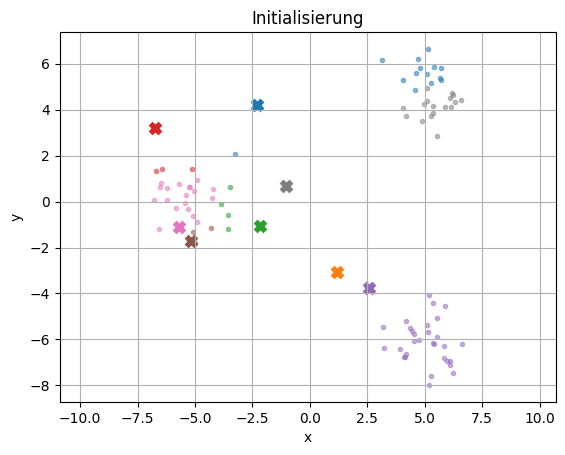

Fehler bei Initialisierung: 4.142042064477969


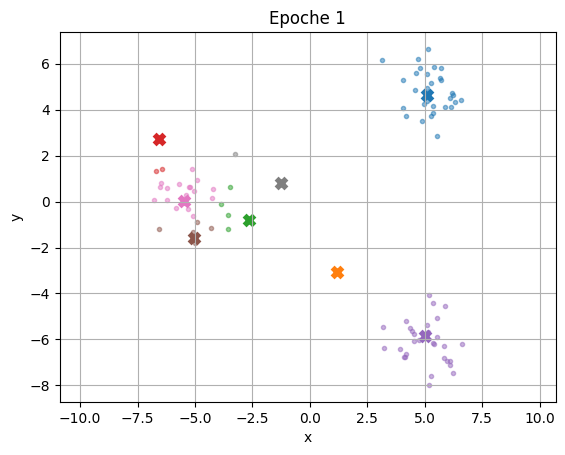

Fehler in Epoche 1: 1.0754087126711915


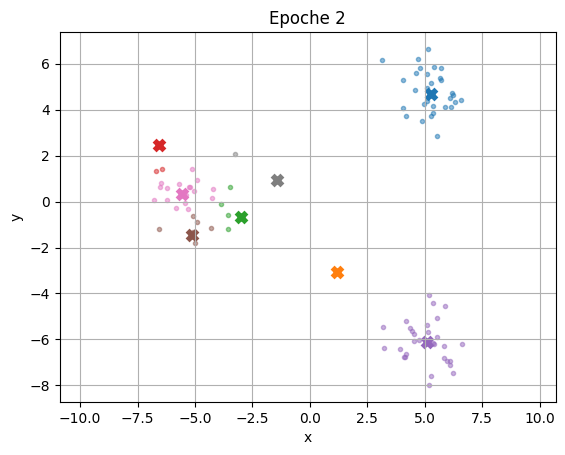

Fehler in Epoche 2: 1.025288760084691


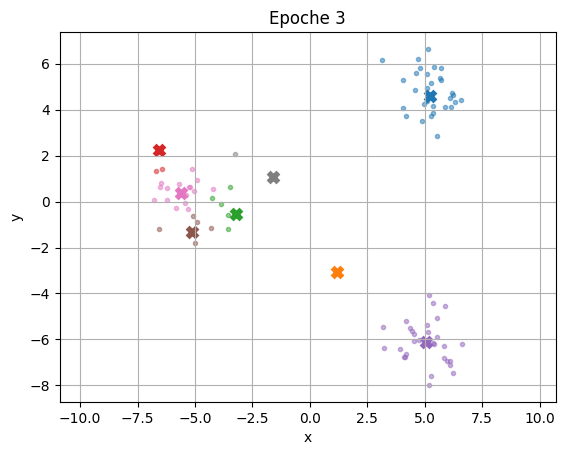

Fehler in Epoche 3: 1.0086509090164546


In [ ]:
# Lösung
# --- Hier kann das k angepasst werden ---
k = 8
# ----------------------------------------
codebook = np.random.rand(k, 2)*(np.max(data, axis=0)-np.min(data, axis=0))+np.min(data, axis=0)
label, error = utils.zugehoerigkeit(codebook, data)
utils.draw(codebook, data, title="Initialisierung")
print(f"Fehler bei Initialisierung: {error}")

for i in range(3): # ggf. Anzahl der Iterationen von 3 erhöhen
    for p in np.random.permutation(data):
        codebook = kmeans_update_pbp(codebook, p, lernrate=0.1) # Aufruf des k-Means-Updates
    label, error = utils.zugehoerigkeit(codebook, data)
    utils.draw(codebook, data, title=f"Epoche {i+1}")
    print(f"Fehler in Epoche {i+1}: {error}")


# Farbreduktion in Bildern
Eben haben wir gesehen, wie k-Means ähnliche zweidimensionale Datenpunkte gruppiert ("clustert").
Jetzt wollen wir dieses Prinzip auch auf Farbbilder anwenden, genauer gesagt auf RGB-Bilder, d.h. Bilder mit Farbkanälen für Rot, Grün und Blau.

## Vorverarbeitung
Zuerst müssen wir aber ein paar Hilfsfunktionen implementieren, auf denen die Farbreduktion dann aufbaut.

### Aufgabe
Vervollständigt die Funktionen ```normalize``` und ```imshow``` an den mit `# TO DO` gekennzeichneten Stellen. Die Aufgabe, Ein- und Ausgabewerte der Funktionen findet ihr jeweils als mehrzeiligen Kommentar im Funktionsrumpf.

*Hinweis:* Wie transformiert man den Wertebereich $[a, b]$ auf das Intervall $[0, 1]$? Orientiert euch für die zweite Funktion an [imshow von matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

In [ ]:
def normalize(img):
    """
    Normalisiert Bild, sodass der Wertebereich das Intervall [0, 1] ist.

    Eingabe:
        img: zu normalisierendes Bild (Numpy-Array).

    Ausgabe:
        normalisiertes Bild (Numpy-Array).
    """
    i = img.copy()

    #
    # TODO
    #

    return i

In [ ]:
def load_img(path, maxlen=1000):
    """
    Lädt lokales Bild.

    Eingabe:
        path: Speicherort des Bildes.
        maxlen: Maximale Länge der längeren Seite.

    Ausgabe:
        normalisiertes Bild als Numpy-Array.
    """
    img = plt.imread(path)
    while np.max(img.shape) > maxlen:
        img = img[::2, ::2]
    return normalize(img)

def imshow(img):
    """
    Plottet Bild ohne Achsenbeschriftung.

    Eingabe:
        img: Bild als Numpy-Array.

    Ausgabe:
        None
    """

    #
    # TODO
    #


In [ ]:
# Lösung
def normalize(img):
    """
    Normalisiert Bild, sodass der Wertebereich das Intervall [0, 1] ist.

    Eingabe:
        img: zu normalisierendes Bild (Numpy-Array).

    Ausgabe:
        normalisiertes Bild (Numpy-Array).
    """
    i = img.copy()
    i -= np.min(i)
    i = i / np.max(i)
    return i

def load_img(path, maxlen=1000):
    """
    Lädt lokales Bild.

    Eingabe:
        path: Speicherort des Bildes.
        maxlen: Maximale Länge der längeren Seite.

    Ausgabe:
        normalisiertes Bild als Numpy-Array.
    """
    img = plt.imread(path)
    #img = io.imread(Link).astype(float)
    while np.max(img.shape) > maxlen:
        img = img[::2, ::2]
    return normalize(img)

def imshow(img):
    """
    Plottet Bild ohne Achsenbeschriftung.

    Eingabe:
        img: Bild als Numpy-Array.

    Ausgabe:
        None
    """

    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()


### Bonusaufgabe
Vervollständigt die Funktion `hex2rgb` an der mit `# TO DO` gekennzeichneten Stelle, die die Farben von Hexadezimal- in RGB-Darstellung überführt.
- Hexadezimaldarstellung: Zeichenkette der Form #$rrggbb$ mit $r$, $g$, $b$ jeweils aus der Menge $\{0, 1, \dots, 9, a, b, \dots, f\}$
- RGB-Wert: Numpy-Array der Form $[r, g, b]$ mit $r$, $g$, $b$ jeweils aus dem Intervall $[0, 1]$

Für `hex2rgb` müssen also die zweistelligen Hexadezimalzahlen $rr$ bzw. $gg$ bzw. $bb$ in die Dezimaldarstellung $(0, \dots, 255)$ überführt und durch $256$ geteilt werden.

*Hinweis:* Mit der Funktion `int(value, base)` könnt ihr den `value` aus dem Zahlensystem des Parameters `base` in die Dezimaldarstellung überführen. Die Hexadezimaldarstellung hat die Basis 16, die Dezimaldarstellung die Basis 10.

In [ ]:
def hex2rgb(c):
    """
    Übersetzt Farbe in Hexadezimaldarstellung in RGB-Werte.

    Eingabe:
        c: Farbe in Hexadezimaldarstellung.

    Ausgabe:
        RGB-Vektor.
    """

    #
    # TODO
    #


In [ ]:
# Lösung
def hex2rgb(c):
    """
    Übersetzt Farbe in Hexadezimaldarstellung in RGB-Werte.

    Eingabe:
        c: Farbe in Hexadezimaldarstellung.

    Ausgabe:
        RGB-Vektor.
    """
    rgb = []
    for i in (1, 3, 5):
        chars = c[i:i+2]
        rgb.append(int(chars, base=16) / 256)
    return np.array(rgb)
    #return np.array(list(int(c[i:i+2], 16)/256 for i in (1, 3, 5)))


## Bild auswählen
Im folgenden Codeblock könnt ihr über das Dropdown-Menü am rechten Rand ein Bild auswählen. Die Bilder werden hinterher so verkleinert, dass die längste Seite maximal 1000 Pixel lang ist. Damit laufen die Algorithmen schneller, ohne dass die Bildqualität stark beeinträchtigt wird.

*Bonus:* Sucht euch ein eigenes Bild und ladet es als .png oder .jpg in die lokal gespeicherten Dateien (📁-Symbol am linken Rand). Entfernt dann den Hashtag in Zeile 2 und ersetzt `euer_dateiname.png` durch die tatsächliche Bezeichnung.

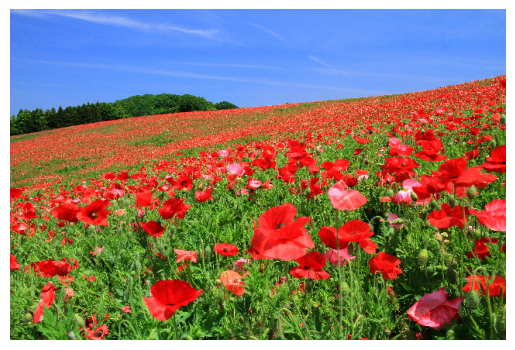

Bild geladen, 132737 unterschiedliche Farben.


In [ ]:
Bild = "Mohnfeld.jpg" # @param ["Mohnfeld.jpg","Rapsfeld.jpg","MRT_Kopf.jpeg","MRT_Tumor.jpeg","Thermo.jpg"]
# Bild = "euer_dateiname.png" # Bonus

img = load_img(Bild) # Bild laden
imshow(img)          # Bild anzeigen

colorlist = np.reshape(img, (-1, 3))
print(f"Bild geladen, {len(np.unique(colorlist, axis=0))} unterschiedliche Farben.")

## Farben wählen
In diesem Abschnitt könnt ihr die Codebook-Vektoren "per Hand" auswählen. Führt dafür den folgenden Codeblock aus, dann wird zunächst das Bild angezeigt und ihr könnt die Farben über einen Colorpicker aussuchen.

*Hinweis:* Dieser Codeblock muss nur ein Mal ausgeführt zu werden. Sämtliche Farben, die ausgewählt wurden, sind anschließend im Arbeitsspeicher hinterlegt, bis die Session beendet wird.

In [ ]:
colors = np.random.rand(8, 3) # 8 zufällig ausgewählte RGB-Farben
clist = [ipywidgets.ColorPicker(value=utils.rgb2hex(c-0.001), layout=ipywidgets.Layout(width='100px')) for c in colors]

imshow(img)
box = ipywidgets.VBox([ipywidgets.HBox(clist[::2]), ipywidgets.HBox(clist[1::2])])
display(box)

## Rekonstruktion "per Hand"
Die soeben ausgewählten Farben können nun zur Quantisierung im Farbraum des Bildes genutzt werden. Der folgende Codeblock führt die Quantisierung automatisch durch und plottet anschließend sowohl das Bild als auch die zugehörige Punktewolke.

### Aufgabe
Sucht im Abschnitt "Farben wählen" eine geeignete Kombination, sodass das Bild möglichst gut rekonstruiert wird! Sowohl für das Mohn- als auch für das Rapsfeld ist es möglich, "mit bloßem Auge" Farben zu finden, sodass der Fehler kleiner als 0.2 ist.

*Achtung:* Der obere Codeblock muss nicht erneut ausgeführt werden! Werden die Farben geändert, liegen sie bereits im Arbeitsspeicher vor. Anschließend muss der untere Codeblock ausgeführt werden.

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7]
Originalbild (links) mit Farbraum als Punktewolke (rechts)
Quantisiertes Bild (links) mit zugehöriger Punktewolke (rechts)
Der Fehler beträgt 0.35736557917857553


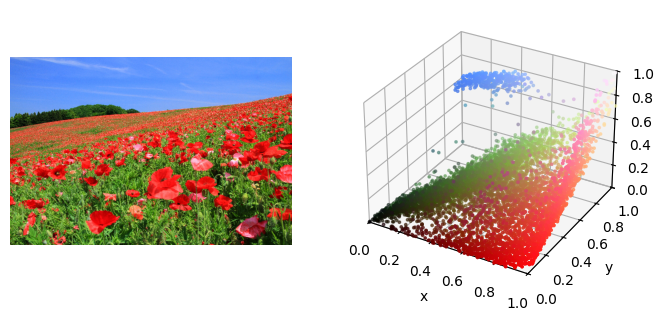

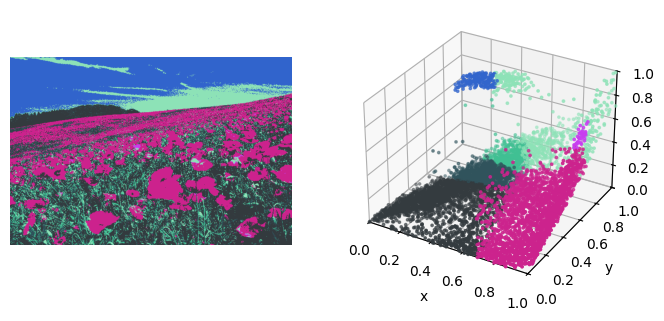

In [ ]:
codebook = np.array([utils.hex2rgb(c.value) for c in clist]) # Farben als Codebook-Vektoren
dists = utils.pointwise_sq(colorlist, codebook) # Abstände
naechster = np.argmin(dists, axis=-1) # Cluster-IDs
img_neu_list = codebook[naechster]
img_neu = np.reshape(img_neu_list, img.shape)
# entspricht build_vq_img(colorlist, codebook, img.shape), ohne Rückgabe von img_neu_list

print("Originalbild (links) mit Farbraum als Punktewolke (rechts)")
utils.plot_img_w_points(img)

print("Quantisiertes Bild (links) mit zugehöriger Punktewolke (rechts)")
print("Der Fehler beträgt", np.mean(np.sqrt(np.sum((img_neu_list-colorlist)**2, axis=-1))))
utils.plot_img_w_points(img_neu, [np.unique(colorlist, axis=0)[::20], codebook[np.argmin(utils.pointwise_sq(np.unique(colorlist, axis=0), codebook), axis=-1)[::20]]])

## TO DO Rekonstruktion mit k-Means


Jetzt möchten wir uns ansehen, was der k-Means-Algorithmus erreichen kann. Hierfür werden zunächst die Codebook-Vektoren zufällig initialisiert und danach iterativ angepasst. Damit der Algorithmus nicht unendlich lange weiterläuft, wird er abgebrochen, sobald sich die Codebook-Vektoren nur noch wenig verändern.

### Aufgabe
Testet den Algorithmus mit verschiedenen Werten für $k$! Ab wann ist kaum noch ein Unterschied zwischen dem echten und dem rekonstruierten Bild zu sehen?

In [ ]:
k = __

max_epochs = 10                 # maximale Anzahl an Iterationen
np.random.seed(2025)            # reproduzierbare Zufallszahlen
codebook = np.random.rand(k, 3) # zufällige Initialisierung der Codebook-Vektoren

img_neu = utils.build_vq_img(colorlist, codebook, shape=img.shape)
_, error = utils.zugehoerigkeit(codebook, colorlist) # Zuordnung zu Clustern
print(f"Bild mit {k} unterschiedlichen Farben hat bei Initialisierung einen Fehler von {error}")
utils.plot_img_w_points(img_neu,
                  [np.unique(colorlist, axis=0)[::20], codebook[np.argmin(utils.pointwise_sq(np.unique(colorlist, axis=0), codebook), axis=-1)[::20]]])

errorlist = []
for epoch in trange(max_epochs):
    cb_alt = codebook.copy()
    codebook, error = utils.kmeans_update(codebook, colorlist) # Batch-Update
    errorlist.append(error)
    if np.max(np.sum((cb_alt - codebook) ** 2, axis=-1)) < 1e-3: # Abbruchkriterium
        break

# Fehler plotten
plt.figure()
plt.plot(errorlist)
plt.xlabel("Iteration"); plt.ylabel("Fehler")
plt.xticks(np.arange(len(errorlist)))
plt.title("Fehler")
plt.show()

img_neu = utils.build_vq_img(colorlist, codebook, shape=img.shape)
print(f"Bild mit {k} unterschiedlichen Farben hat am Ende einen Fehler von {errorlist[-1]}")
utils.plot_img_w_points(img_neu, [np.unique(colorlist, axis=0)[::20], codebook[np.argmin(utils.pointwise_sq(np.unique(colorlist, axis=0), codebook), axis=-1)[::20]]])

True
Bild mit 8 unterschiedlichen Farben hat bei Initialisierung einen Fehler von 0.26788285074877854


  0%|          | 0/10 [00:00<?, ?it/s]

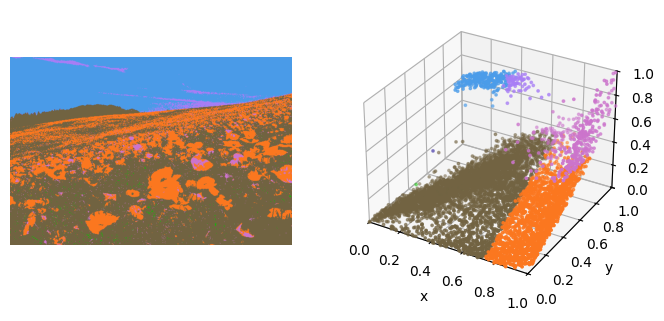

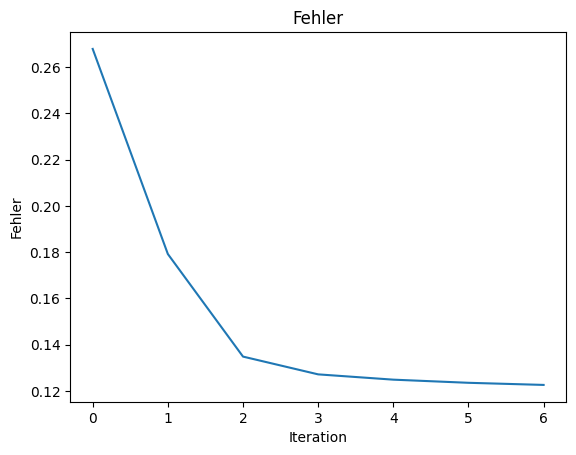

Bild mit 8 unterschiedlichen Farben hat am Ende einen Fehler von 0.12256261719939887


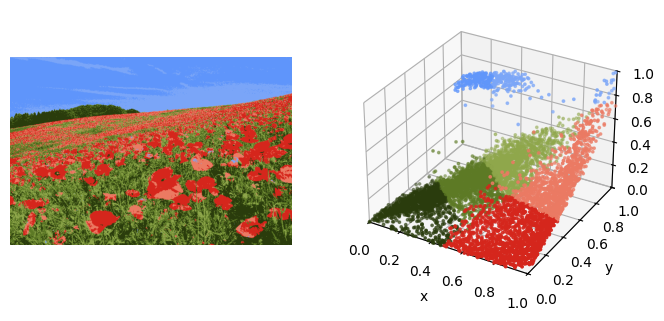

In [ ]:
# Lösung
# MRT mit Tumor: k=8, epochs=30
k = 8

max_epochs = 10
np.random.seed(2025)
codebook = np.random.rand(k, 3)

img_neu = utils.build_vq_img(colorlist, codebook, shape=img.shape)
_, error = utils.zugehoerigkeit(codebook, colorlist)
print(f"Bild mit {k} unterschiedlichen Farben hat bei Initialisierung einen Fehler von {error}")
utils.plot_img_w_points(img_neu, [np.unique(colorlist, axis=0)[::20], codebook[np.argmin(utils.pointwise_sq(np.unique(colorlist, axis=0), codebook), axis=-1)[::20]]])

errorlist = []
for epoch in trange(max_epochs):
    cb_alt = codebook.copy()
    codebook, error = utils.kmeans_update(codebook, colorlist)
    errorlist.append(error)
    if np.max(np.sum((cb_alt-codebook)**2, axis=-1))<1e-3:
        break


plt.figure()
plt.plot(errorlist)
plt.xlabel("Iteration"); plt.ylabel("Fehler")
plt.xticks(np.arange(len(errorlist)))
plt.title("Fehler")
plt.show()

img_neu = utils.build_vq_img(colorlist, codebook, shape=img.shape)
print(f"Bild mit {k} unterschiedlichen Farben hat am Ende einen Fehler von {errorlist[-1]}")
utils.plot_img_w_points(img_neu, [np.unique(colorlist, axis=0)[::20], codebook[np.argmin(utils.pointwise_sq(np.unique(colorlist, axis=0), codebook), axis=-1)[::20]]])